# Correcting errors in qubits

In [3]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')

In [4]:
def get_noise(p_meas,p_gate):
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

In [5]:
noise_model = get_noise(0.01,0.01)

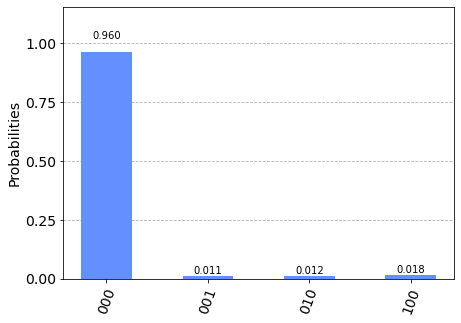

In [6]:
qc0 = QuantumCircuit(3) # initialize circuit with three qubits in the 0 state
qc0.measure_all() # measure the qubits

# run the circuit with the noise model and extract the counts
qobj = assemble(qc0)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)

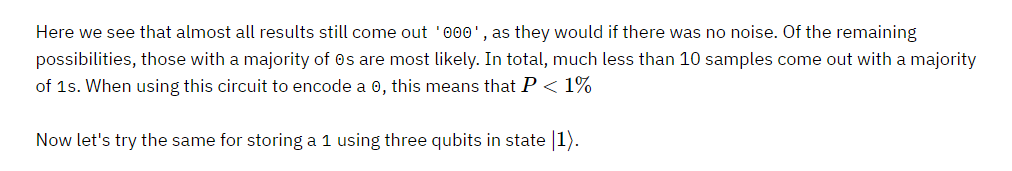

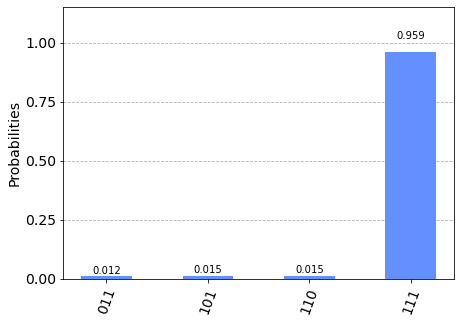

In [7]:
qc1 = QuantumCircuit(3) # initialize circuit with three qubits in the 0 state
qc1.x([0,1,2]) # flip each 0 to 1

qc1.measure_all() # measure the qubits

# run the circuit with th noise model and extract the counts
qobj = assemble(qc1)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)

The number of samples that come out with a majority in the wrong state (0 in this case) is again much less than 10, so P<1%. Whether we store a 0 or a 1, we can retrieve the information with a smaller probability of error than either of our sources of noise.

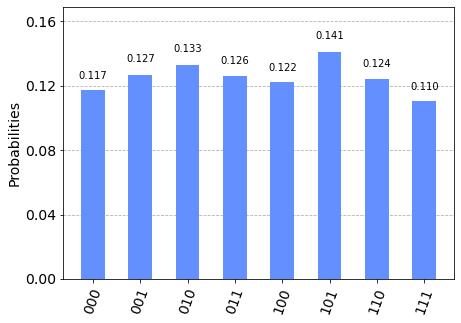

In [8]:
noise_model = get_noise(0.5,0.0)
qobj = assemble(qc1)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()
plot_histogram(counts)

With this noise, all outcomes occur with equal probability, with differences in results being due only to statistical noise. No trace of the encoded state remains. This is an important point to consider for error correction: sometimes the noise is too strong to be corrected. The optimal approach is to combine a good way of encoding the information you require, with hardware whose noise is not too strong.